# EDA

Exploramos el dataset de 2008 en http://stat-computing.org/dataexpo/2009/the-data.html

In [3]:
import pandas as pd
import os

pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:,.3f}'.format

print(os.getcwd())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
/Users/pau/repo_pau/master_SAN/EOI/Modulo6.Analisis_de_datos


In [14]:
DATA_FOLDER = '/Users/pau/repo_pau/master_SAN/EOI/Modulo6.Analisis_de_datos/'
LIST_DATA = os.listdir(DATA_FOLDER)
LIST_DATA

['ejemplos parecidos a la actividad.ipynb',
 'actividad 1 random walk.ipynb',
 'ejemplos de análisis gráfico.ipynb',
 '2008.csv',
 'ejemplos numpy.ipynb']

In [15]:
CSV_LIST = [file for file in LIST_DATA if '.csv' in file]
CSV_LIST = [file for file in LIST_DATA if file[-4:] == '.csv']
CSV_LIST

['2008.csv']

In [9]:
!head -n 2 data/2008.csv

zsh:1: command not found: head


In [16]:
df = pd.read_csv(DATA_FOLDER + CSV_LIST[0], 
                 na_values='nan')

In [17]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,8,13,3,"1,130.000",1140,"1,419.000",1428,XE,2625,N13914,109.000,108.000,90.000,-9.000,-10.000,BHM,CLE,604,7.000,12.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,11,7,5,"1,355.000",1359,"1,635.000",1623,FL,164,N337AT,160.000,144.000,139.000,12.000,-4.000,DTW,MCO,957,6.000,15.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,2,3,641.000,650,817.000,810,B6,242,N624JB,96.000,80.000,57.000,7.000,-9.000,LGB,OAK,353,4.000,35.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,3,8,6,957.000,952,"1,128.000",1120,XE,2322,N11127,211.000,208.000,191.000,8.000,5.000,IAH,PSP,1269,5.000,15.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,4,26,6,550.000,600,603.000,626,YV,2773,N926LR,133.000,146.000,116.000,-23.000,-10.000,SAT,PHX,843,9.000,8.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(50000, 29)

In [19]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [24]:
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                975
CRSDepTime               0
ArrTime               1081
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                602
ActualElapsedTime     1101
CRSElapsedTime           8
AirTime               1101
ArrDelay              1101
DepDelay               975
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1081
TaxiOut                983
Cancelled                0
CancellationCode     49014
Diverted                 0
CarrierDelay         39043
WeatherDelay         39043
NASDelay             39043
SecurityDelay        39043
LateAircraftDelay    39043
dtype: int64

In [22]:
df.isnull().sum().div(df.shape[0]).mul(100).sort_values(ascending=False)

CancellationCode    98.028
LateAircraftDelay   78.086
SecurityDelay       78.086
NASDelay            78.086
WeatherDelay        78.086
CarrierDelay        78.086
ActualElapsedTime    2.202
AirTime              2.202
ArrDelay             2.202
TaxiIn               2.162
ArrTime              2.162
TaxiOut              1.966
DepTime              1.950
DepDelay             1.950
TailNum              1.204
CRSElapsedTime       0.016
Cancelled            0.000
DayofMonth           0.000
DayOfWeek            0.000
CRSDepTime           0.000
Diverted             0.000
FlightNum            0.000
Distance             0.000
Dest                 0.000
Origin               0.000
Month                0.000
CRSArrTime           0.000
UniqueCarrier        0.000
Year                 0.000
dtype: float64

In [25]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,"50,000.000","50,000.000","50,000.000","50,000.000","49,025.000","50,000.000","48,919.000","50,000.000","50,000.000","48,899.000","49,992.000","48,899.000","48,899.000","49,025.000","50,000.000","48,919.000","49,017.000","50,000.000","50,000.000","10,957.000","10,957.000","10,957.000","10,957.000","10,957.000"
mean,"2,008.000",6.367,15.749,3.923,"1,337.244","1,327.982","1,483.993","1,497.363","2,222.363",127.449,128.932,104.082,8.419,10.280,727.220,6.866,16.517,0.020,0.002,16.074,3.201,17.435,0.096,20.626
std,0.000,3.419,8.781,1.980,477.218,463.571,505.836,482.299,"1,958.998",70.563,69.675,67.684,38.951,36.053,563.611,4.912,11.488,0.139,0.048,40.704,20.422,32.425,2.169,39.910
min,"2,008.000",1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,15.000,-18.000,6.000,-61.000,-39.000,31.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,"2,008.000",3.000,8.000,2.000,931.000,930.000,"1,108.000","1,115.000",619.000,76.000,80.000,55.000,-10.000,-4.000,325.000,4.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,"2,008.000",6.000,16.000,4.000,"1,330.000","1,325.000","1,516.000","1,520.000","1,570.500",110.000,111.000,86.000,-2.000,-1.000,581.000,6.000,14.000,0.000,0.000,0.000,0.000,6.000,0.000,0.000
75%,"2,008.000",9.000,23.000,6.000,"1,729.000","1,715.000","1,910.000","1,908.000","3,509.000",157.000,159.000,132.000,12.000,8.000,948.000,8.000,19.000,0.000,0.000,17.000,0.000,21.000,0.000,25.000
max,"2,008.000",12.000,31.000,7.000,"2,400.000","2,359.000","2,400.000","2,400.000","7,828.000",649.000,660.000,617.000,"1,011.000","1,061.000","4,962.000",128.000,281.000,1.000,1.000,"1,011.000",642.000,456.000,128.000,686.000


In [31]:
df.Year.unique(), df.Origin.unique()

(array([2008]),
 array(['BHM', 'DTW', 'LGB', 'IAH', 'SAT', 'IAD', 'PDX', 'MEM', 'BOS',
        'PBI', 'CMH', 'RDD', 'EWR', 'MCI', 'SFO', 'LGA', 'PHL', 'LAS',
        'JFK', 'JAX', 'ORD', 'MDW', 'ATL', 'LAX', 'DEN', 'RNO', 'PVD',
        'CVG', 'AUS', 'DCA', 'OAK', 'CDC', 'CRP', 'PHX', 'SAN', 'SRQ',
        'SLC', 'RIC', 'GRR', 'MRY', 'BUF', 'MSN', 'DFW', 'ABQ', 'MCO',
        'BWI', 'VPS', 'ROC', 'ALB', 'HOU', 'BNA', 'TUS', 'AMA', 'DSM',
        'HNL', 'SEA', 'MIA', 'EKO', 'IND', 'SGF', 'SWF', 'SNA', 'KOA',
        'TPA', 'MKE', 'SMF', 'CLE', 'MSY', 'CLT', 'AVL', 'RDU', 'BOI',
        'CHS', 'ANC', 'ICT', 'MHT', 'LIH', 'BDL', 'DBQ', 'CPR', 'PFN',
        'OMA', 'MGM', 'SJC', 'STL', 'SBN', 'EVV', 'ELP', 'SCE', 'DAL',
        'ONT', 'MSP', 'YUM', 'LIT', 'MDT', 'MAF', 'LBB', 'TVC', 'SDF',
        'SJU', 'DLH', 'XNA', 'IDA', 'OGG', 'HSV', 'COD', 'FLL', 'PWM',
        'JAN', 'BUR', 'RST', 'TYS', 'PIT', 'EUG', 'BZN', 'TUL', 'HLN',
        'ISP', 'CWA', 'DAB', 'MSO', 'SYR', 'FSM', 'BTR', 'GEG

In [35]:
df.ArrDelay, df.DepDelay

(0        -9.000
 1        12.000
 2         7.000
 3         8.000
 4       -23.000
           ...  
 49995    84.000
 49996   -17.000
 49997     3.000
 49998     1.000
 49999   -13.000
 Name: ArrDelay, Length: 50000, dtype: float64,
 0       -10.000
 1        -4.000
 2        -9.000
 3         5.000
 4       -10.000
           ...  
 49995    83.000
 49996    -5.000
 49997     8.000
 49998    14.000
 49999    -2.000
 Name: DepDelay, Length: 50000, dtype: float64)

In [40]:
df['TotalDelay'] = df.ArrDelay.add(df.DepDelay)

In [41]:
df.shape

(50000, 30)

In [59]:
sample = df.sample(frac=0.1)
sample.shape

(5000, 30)

In [60]:
df.TotalDelay.max(), df.Distance.max()

(2070.0, 4962)

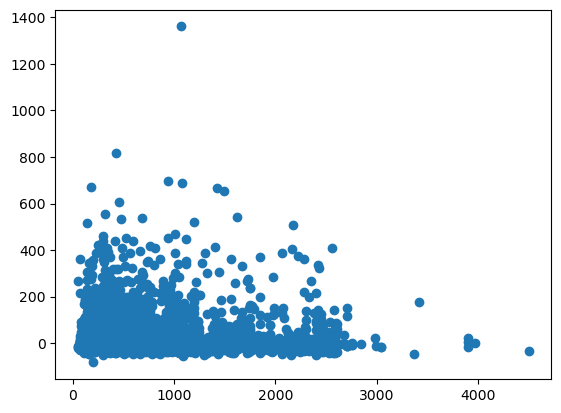

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(sample.Distance, sample.TotalDelay);

## para TABLA INFORMA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


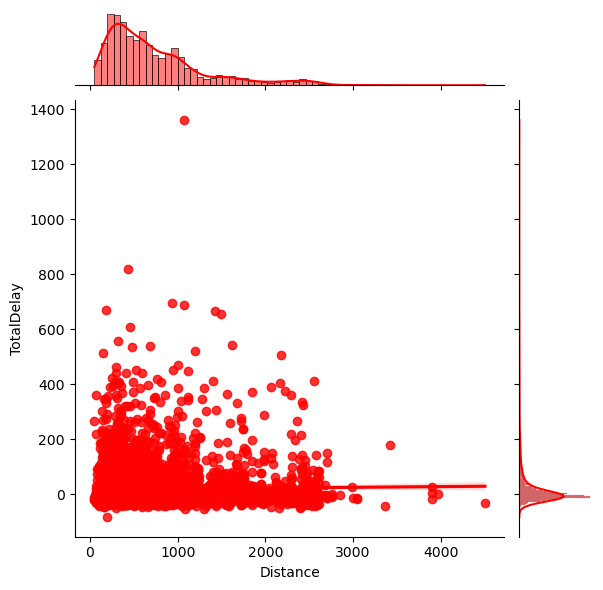

In [70]:
import seaborn as sns
sns.jointplot(x='Distance', y='TotalDelay', data=sample, kind='reg', color='red');

In [15]:
df.CancellationCode.unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

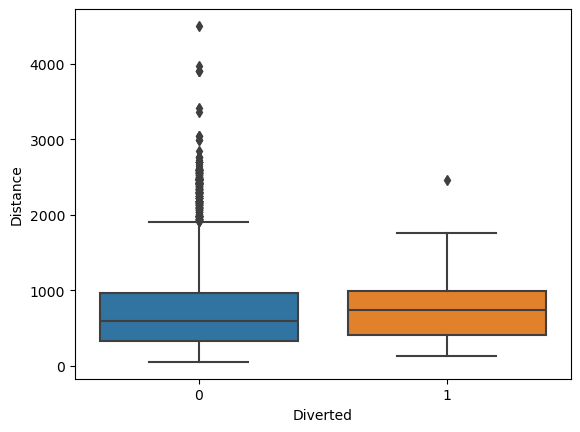

In [74]:
sns.boxplot(x='Diverted', y='Distance', data=sample);

In [92]:
sample.count()

Year                 5000
Month                5000
DayofMonth           5000
DayOfWeek            5000
DepTime              4899
CRSDepTime           5000
ArrTime              4890
CRSArrTime           5000
UniqueCarrier        5000
FlightNum            5000
TailNum              4935
ActualElapsedTime    4886
CRSElapsedTime       5000
AirTime              4886
ArrDelay             4886
DepDelay             4899
Origin               5000
Dest                 5000
Distance             5000
TaxiIn               4890
TaxiOut              4899
Cancelled            5000
CancellationCode      101
Diverted             5000
CarrierDelay         1074
WeatherDelay         1074
NASDelay             1074
SecurityDelay        1074
LateAircraftDelay    1074
TotalDelay           4886
dtype: int64

In [113]:
print('te dice cuantas entradas no nulas existen cuando el valor del campo por el que agrupas es X (A,B,C)')
print('existen 40')
sample.groupby('CancellationCode').count()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
CancellationCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,40,40,40,40,0,40,0,40,40,40,11,0,40,0,0,0,40,40,40,0,0,40,40,0,0,0,0,0,0
B,36,36,36,36,0,36,0,36,36,36,13,0,36,0,0,0,36,36,36,0,0,36,36,0,0,0,0,0,0
C,25,25,25,25,0,25,0,25,25,25,12,0,25,0,0,0,25,25,25,0,0,25,25,0,0,0,0,0,0


In [123]:
sample[sample.CancellationCode.isna()].Year.count()

4899

In [109]:
sample.CancellationCode.unique()

array([nan, 'A', 'B', 'C'], dtype=object)

In [116]:
sample[sample.CancellationCode=='A'].head(4)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
30632,2008,2,13,3,NaN,1930,NaN,2020,MQ,3824,NaN,NaN,50.000,NaN,NaN,NaN,DAL,AUS,189,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,NaN
37202,2008,1,15,2,NaN,1810,NaN,1931,UA,1170,NaN,NaN,81.000,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,NaN
22519,2008,12,5,5,NaN,2215,NaN,2329,NW,144,N1332U,NaN,74.000,NaN,NaN,NaN,MSP,ORD,334,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,NaN
3151,2008,3,25,2,NaN,1920,NaN,1950,MQ,4047,NaN,NaN,90.000,NaN,NaN,NaN,CVG,ORD,264,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
sample.groupby('CancellationCode').count()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
CancellationCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,40,40,40,40,0,40,0,40,40,40,11,0,40,0,0,0,40,40,40,0,0,40,40,0,0,0,0,0,0
B,36,36,36,36,0,36,0,36,36,36,13,0,36,0,0,0,36,36,36,0,0,36,36,0,0,0,0,0,0
C,25,25,25,25,0,25,0,25,25,25,12,0,25,0,0,0,25,25,25,0,0,25,25,0,0,0,0,0,0


In [83]:
sample.groupby('Year').count()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,5000,5000,5000,4899,5000,4890,5000,5000,5000,4935,4886,5000,4886,4886,4899,5000,5000,5000,4890,4899,5000,101,5000,1074,1074,1074,1074,1074,4886


In [80]:
sample.groupby('CancellationCode')['CancellationCode'].head()

30632    A
37202    A
22519    A
40286    B
3151     A
27867    B
28516    B
42161    C
1733     B
28791    B
5312     C
15683    A
36958    C
17371    C
39349    C
Name: CancellationCode, dtype: object

In [17]:
cancelation_prop = sample.groupby('CancellationCode')['Year'].count().div(sample.shape[0]) * 100
cancelation_prop

CancellationCode
A   0.780
B   0.770
C   0.419
Name: Year, dtype: float64

In [130]:
sample.groupby('CancellationCode').count()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
CancellationCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,40,40,40,40,0,40,0,40,40,40,11,0,40,0,0,0,40,40,40,0,0,40,40,0,0,0,0,0,0
B,36,36,36,36,0,36,0,36,36,36,13,0,36,0,0,0,36,36,36,0,0,36,36,0,0,0,0,0,0
C,25,25,25,25,0,25,0,25,25,25,12,0,25,0,0,0,25,25,25,0,0,25,25,0,0,0,0,0,0


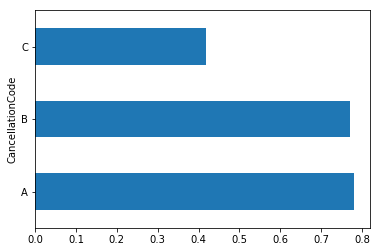

In [19]:
cancelation_prop.plot(kind='barh');

## Para variable categórica

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


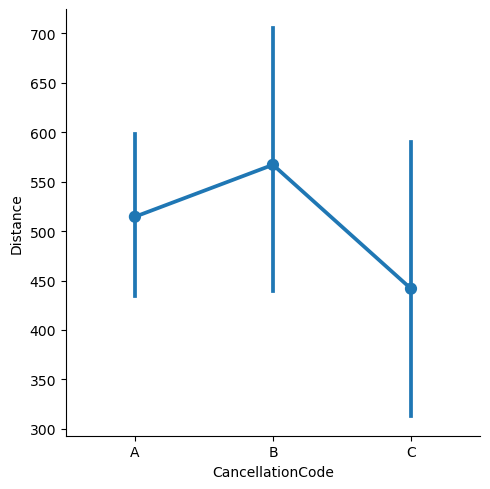

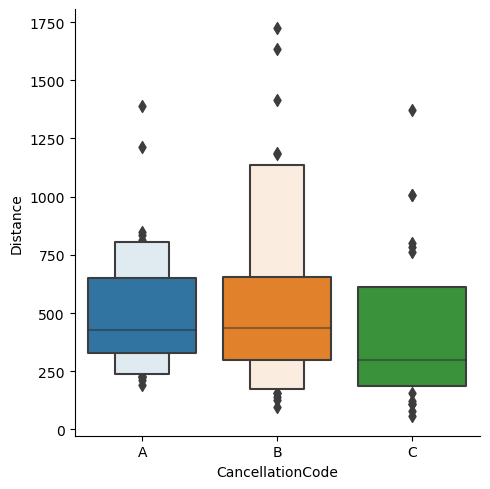

In [135]:
sns.catplot(x='CancellationCode', y ='Distance', data=sample, kind='point');
sns.catplot(x='CancellationCode', y ='Distance', data=sample, kind='boxen');

In [21]:
# sample.sample(frac=0.1).Month.plot('barh')

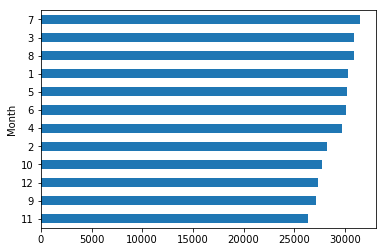

In [24]:
sample.groupby("Month")["Year"].count().sort_values().plot(kind='barh');

In [141]:
sample.Diverted.groupby('Diverted').count()

KeyError: 'Diverted'

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


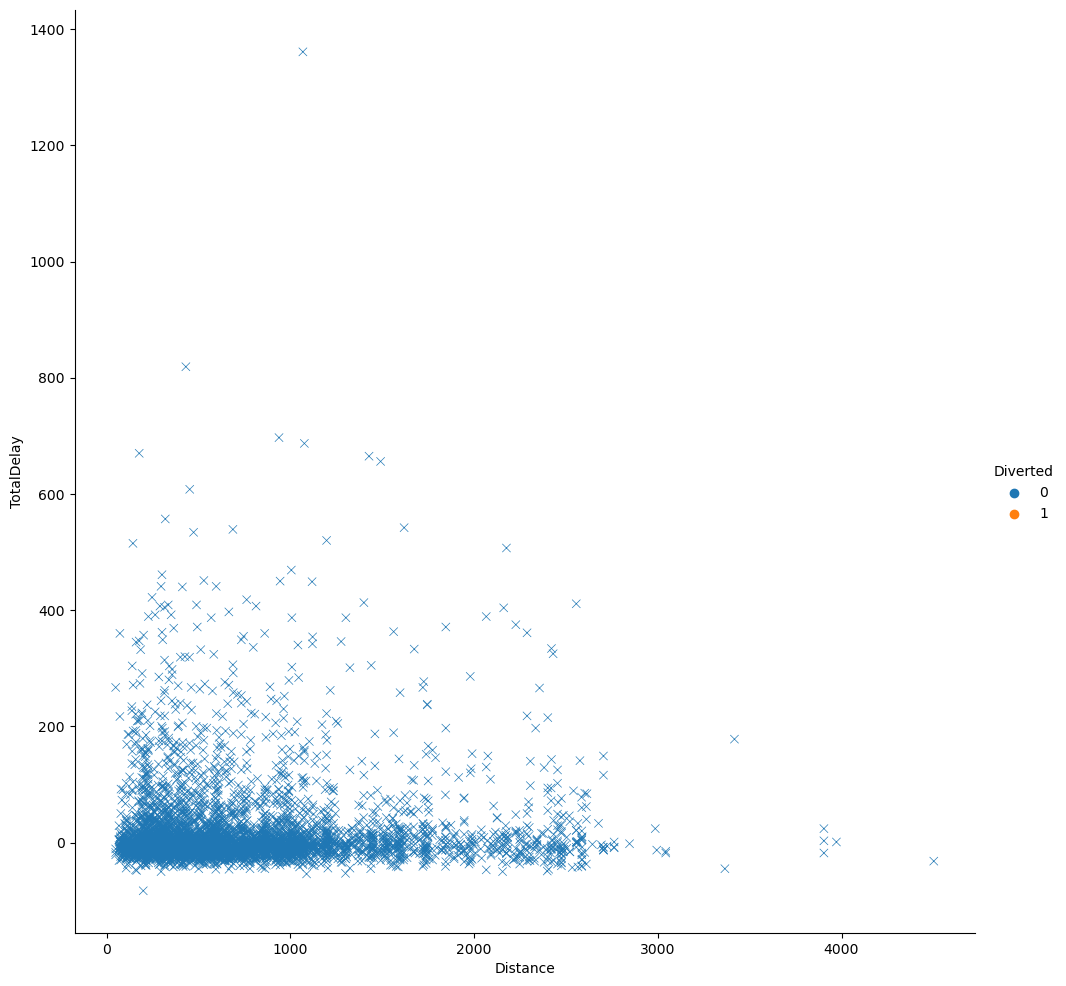

In [142]:
sns.pairplot(sample, x_vars=['Distance'], y_vars=['TotalDelay'], hue='Diverted', markers='x', size=10, aspect=1);

In [144]:
sample.Diverted.value_counts()

Diverted
0    4987
1      13
Name: count, dtype: int64

In [143]:
sample.Cancelled.value_counts()

Cancelled
0    4899
1     101
Name: count, dtype: int64